# JSON exercise (_solution_)
****

## 1. Find the 10 countries with most projects

In [119]:
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import json
%matplotlib inline

In [120]:
def plot_barchart(df, title, xlabel, ylabel):
    # this enables settings which can automatically convert any matplotlib plot into XKCD style. Hell yeah!
    plt.xkcd() 

    # plot bars and increase their width for cosmetics
    ax = df.plot(kind='bar', title=title, legend=False, align='edge', width=2)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)

    # I didn't like the log scale in this chart, it looks buggy:
    # ax.set_yscale('log')
    # so instead, show the Y ticks with raw numbers
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: '%.f' % x))

    # hide xticks but show xlabel
    plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')

    plt.legend(bbox_to_anchor=(1.05, 1), loc=2)   

#### Compute the number of occurrences per country

In [121]:
df = pd.read_json('data/world_bank_projects.json')

cc_count = df['countrycode'].value_counts()
top10_count = pd.DataFrame({'countrycode':cc_count.index, 'count':cc_count.values}).head(10)
print(top10_count.head())

   count countrycode
0     19          CN
1     19          ID
2     17          VN
3     16          IN
4     13          RY


#### Print the countrycodes from our top10 

In [122]:
top10_count.countrycode.values

array(['CN', 'ID', 'VN', 'IN', 'RY', 'BD', 'MA', 'NP', 'MZ', '3A'], dtype=object)

#### Finally, use each countrycode from the list to find a correspondent countryname and print it

In [123]:
top10_countries = []

print("========== These are the 10 countries with most projects ==========")

for i, cc in enumerate(top10_count.countrycode.values):
    unique_name_list = df.loc[df['countrycode'] == cc].countryname.unique()
    country = unique_name_list[0]
    print(str(i+1) + ". " + country)
    
    top10_countries.append(country)      

========== These are the 10 countries with most projects ==========
1. People's Republic of China
2. Republic of Indonesia
3. Socialist Republic of Vietnam
4. Republic of India
5. Republic of Yemen
6. People's Republic of Bangladesh
7. Kingdom of Morocco
8. Nepal
9. Republic of Mozambique
10. Africa


#### Matplotlib also has beautiful graphics capabilities: let's plot these results!

In [124]:
# create a new dataframe to plot results
dict_new = { 'count' : top10_count['count'].values.tolist(), 'country' : top10_countries }
result = pd.DataFrame(dict_new)

#print(result.head()):
#                                 count
# country                               
#  Republic of Indonesia               19
#  People's Republic of China          19
#  Socialist Republic of Vietnam       17
#  ...

# to improve plot() readability, convert rows into columns:
result = pd.pivot_table(result, columns='country', values="count")

# sort columns by row value
sorted_result = result.sort_values(result.last_valid_index(), ascending=False, axis=1)

# print(sorted_result.head())
# country    China    Indonesia    Vietnam    ...
# count          19        19        17

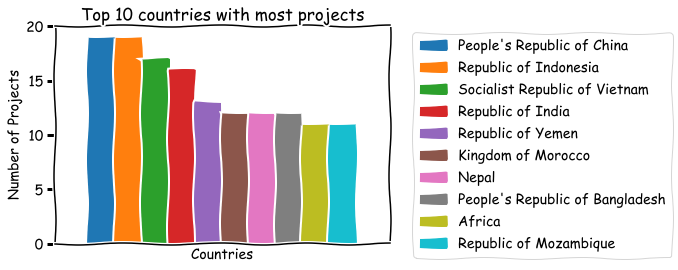

In [125]:
plot_barchart(sorted_result, 'Top 10 countries with most projects', 'Countries', 'Number of Projects')
plt.ylim(0, 20)
plt.show()

***
## 2. Find the top 10 major project themes (using columns 'totalcommamt' and 'mjtheme')

### On this solution we assume 2 different meanings for *major*:
- Major as in "most expensive";
- Major as in "most frequent";

### List the top 10 most expensive projects and their respective project themes

In [126]:
# load input file as DataFrame
df = pd.read_json('data/world_bank_projects.json') 

# use data from <mjtheme, totalcommamt> to identify the top 10 major project themes
top10_expensive = df.sort_values(by=['totalcommamt'], ascending=False).head(10)[['totalcommamt','mjtheme']]

# each element from <mjtheme> is a list: 
#   [Public sector governance, Financial and priva...
# Convert the list into a single string
top10_expensive['mjtheme'] = top10_expensive['mjtheme'].apply(lambda x: ', '.join(x))
print(top10_expensive)

     totalcommamt                                            mjtheme
129    1307800000  Economic management, Public sector governance,...
147     800000000  Rule of law, Trade and integration, Financial ...
377     650000000  Social dev/gender/inclusion, Rural development...
463     600000000  Public sector governance, Social protection an...
49      600000000  Social dev/gender/inclusion, Social protection...
101     585400000           Financial and private sector development
112     550000000  Human development, Social protection and risk ...
110     500000000  Social dev/gender/inclusion, Social protection...
391     500000000  Human development, Public sector governance, S...
6       500000000  Public sector governance, Financial and privat...


In [127]:
# to improve plot() readability, convert rows into columns:
result = pd.pivot_table(top10_expensive, columns='mjtheme', values="totalcommamt")
#print(result)

# sort columns by row value
sorted_result = result.sort_values(result.last_valid_index(), ascending=False, axis=1)
#print(sorted_result)

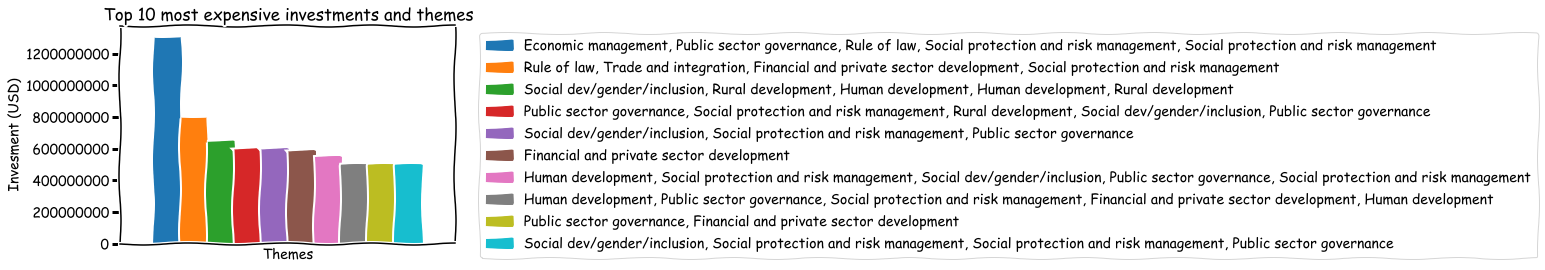

In [128]:
plot_barchart(sorted_result, 'Top 10 most expensive investments and themes', 'Themes', 'Invesment (USD)')

### List the top 10 most frequent project themes

In [129]:
# Start with some data cleaning! Several elements of <mjtheme> are a list of strings 
# but some are NaN, so replace them with an empty string
df.fillna(value="", inplace=True)

# Create a dict to store the names of all major themes and the number of occurences of that name
theme_list = { }  # key is project_name, value is the frequency

def count_mjtheme_frequency(row):
    themes = row['mjtheme']
    if (themes == ""):
        return
    
    for name in themes:
        if name in theme_list:
            theme_list[name] += 1
        else:
            theme_list[name] = 1
            
# call count_mjtheme_frequency() to compute the number of occurences of each major theme             
df.apply(count_mjtheme_frequency, axis=1)    
    
# create a new DataFrame with this data
mjtheme_df = pd.DataFrame(list(theme_list.items()), columns=['Theme', 'Frequency'])

In [130]:
top10_frequent = mjtheme_df.sort_values(by=['Frequency'], ascending=False).head(10)
print(top10_frequent)

                                          Theme  Frequency
5  Environment and natural resources management        223
8                             Rural development        202
0                             Human development        197
4                      Public sector governance        184
2         Social protection and risk management        158
7      Financial and private sector development        130
6                   Social dev/gender/inclusion        119
3                         Trade and integration         72
9                             Urban development         47
1                           Economic management         33


In [131]:
# to improve plot() readability, convert rows into columns:
result = pd.pivot_table(top10_frequent, columns='Theme', values="Frequency")

# sort columns by row value
sorted_result = result.sort_values(result.last_valid_index(), ascending=False, axis=1)
#print(sorted_result)

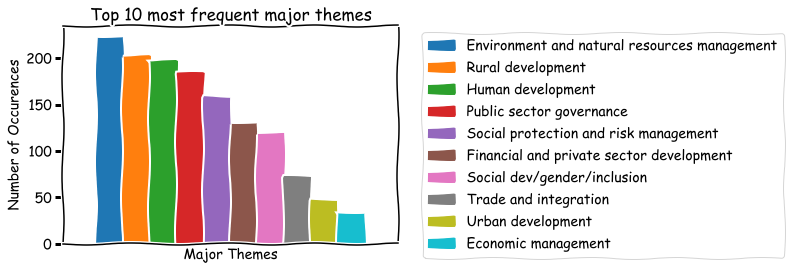

In [132]:
plot_barchart(sorted_result, 'Top 10 most frequent major themes', 'Major Themes', 'Number of Occurences')
plt.show()

***
## 3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [133]:
# Actually, none of my solutions in the previous exercise faced this problem. 
# However, to satisfy exercise 3, the following solution examines the data 
# in <mjtheme_namecode> and fixes the missing references when necessary.

# open json file and normalize column 'mjtheme_namecode'
with open('data/world_bank_projects.json') as f:
    data = json.load(f)

mjtheme_df = json_normalize(data, 'mjtheme_namecode')
mjtheme_df.head(5)

,code,name
0,8,Human development
1,11,
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration


### Cleaning data: fix bad data types and create separate lists with all unique Code and Name values

In [134]:
# Fix data types: mjtheme_df.code is of type *object* but should be int
mjtheme_df.code = mjtheme_df.code.astype(int)

# Drop all duplicated entries so we can generate a unique dictionary of <code, name>
codename = mjtheme_df[mjtheme_df.name != ''].drop_duplicates().sort_values(by=['code'])
codename_dict = codename.to_dict(orient='list')

# Divide the dictionary in 2 separate lists
code_list = codename_dict['code']
name_list = codename_dict['name']
print("codes = ", code_list, "\n")
print("names = ", name_list)

codes =  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11] 

names =  ['Economic management', 'Public sector governance', 'Rule of law', 'Financial and private sector development', 'Trade and integration', 'Social protection and risk management', 'Social dev/gender/inclusion', 'Human development', 'Urban development', 'Rural development', 'Environment and natural resources management']


In [135]:
# Now, process the original DataFrame and replace the broken JSON entries in <mjtheme_namecode> with valid ones
df = pd.read_json('data/world_bank_projects.json')

# Print a few entries that have problems to see how bad they are:
print(df['mjtheme_namecode'].loc[0]) 
print(df['mjtheme_namecode'].loc[5]) 

[{'code': '8', 'name': 'Human development'}, {'code': '11', 'name': ''}]
[{'code': '6', 'name': 'Social protection and risk management'}, {'code': '6', 'name': ''}]


### Cleaning data: find rows with an empty Name and replace them with their associated Name from *code_list*

In [136]:
import collections

# fix_mjtheme_namecode() receives a row to analyse the value stored in 'mjtheme_namecode' column.
# The row contains a list of dictionaries, just like the following:
#     [{'code': '8', 'name': 'Human development'}, {'code': '11', 'name': ''}]
# 
def fix_mjtheme_namecode(row):    
    # Inspect and fix the json for empty 'name'. First, iterate over the list of dicts:
    list_of_dicts = row['mjtheme_namecode']
    replaced = False
    
    for list_idx, element in enumerate(list_of_dicts):
        #print("element=", element)                     # {'code': '8', 'name': 'Human development'}        
        first, second = element.items()  
        #print("first=", first, "second=", second)      # first=('code', '8')    second=('name', 'Human development')
        fString, code = first
        sString, name = second
        #print("code=", code, "name=", name)            # code= 8 name= Human development

        # when name is empty, search for the real name based on it's numeric code
        if (not name):                        
            for i, c in enumerate(code_list):
                if (int(code) == c):
                    # found the candidate name! Repack it into a tuple:
                    new_name = name_list[i]
                    second = (sString, new_name)
                    # and reassemble the dictionary as { first, second }:
                    element = collections.OrderedDict((first, second)) 
                    # finally, replace the existing dictionary for the new/improved/fixed version:
                    list_of_dicts[list_idx] = dict(element)
                    replaced = True
                    break
            
    if (replaced):
        row['mjtheme_namecode'] = list_of_dicts    
        
    return row


# by calling apply() we fix the entire 'mjtheme_namecode' column of the DataFrame 
# job accomplished.
df = df.apply(fix_mjtheme_namecode, axis=1)

# Print a few entries that had problems to verify it was really fixed:
print(df.loc[0]['mjtheme_namecode'])
print(df.loc[5]['mjtheme_namecode'])

[{'code': '8', 'name': 'Human development'}, {'code': '11', 'name': 'Environment and natural resources management'}]
[{'code': '6', 'name': 'Social protection and risk management'}, {'code': '6', 'name': 'Social protection and risk management'}]
